In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
def f1(z, c= -0.065 + 0.66j):
    return z ** 2 + c
    
def f2(z, c= -0.06 + 0.67j):
    return z ** 2 + c

In [6]:
def JuliaNaive(f, zmin, zmax, m,n,tmax=256):
    xs = np.linspace(zmin.real, zmax.real, n)
    ys = np.linspace(zmin.imag, zmax.imag, m)
    J = np.ones((m, n)) * tmax
    for r, y in enumerate(ys):
        for c, x in enumerate(xs):
            z = x + 1j * y
            for t in range(tmax):
                z = f(z)
                if np.abs(z) > 2:
                    J[r,c] = t
                    break
    return J

1min 1s ± 3.39 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


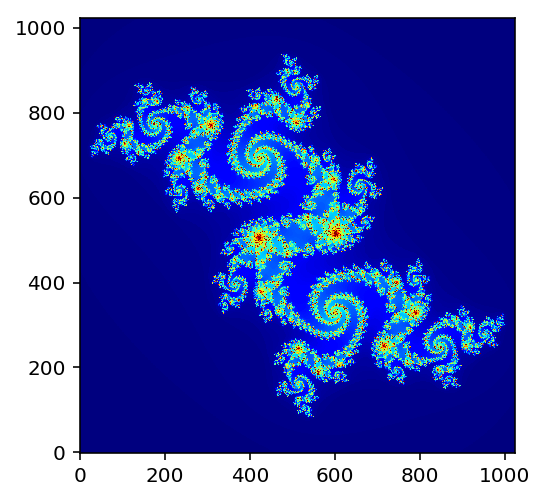

In [9]:
%timeit plt.imshow(JuliaNaive(f1,-1.3 - 1.3j,1.3 + 1.3j,m = 1024, n = 1024), cmap = cm.jet, origin = 'lower')

In [0]:
def Julia(f, zmin, zmax, m, n, tmax=256):
    xs = np.linspace(zmin.real, zmax.real, n)
    ys = np.linspace(zmin.imag, zmax.imag, m)
    X, Y = np.meshgrid(xs, ys)
    Z = X + 1j * Y
    J = np.ones(Z.shape) * tmax
    for t in range(tmax):
        mask = np.abs(Z) <= 2.
        Z[ mask] = f(Z[mask])
        J[~mask] -= 1
    return J

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


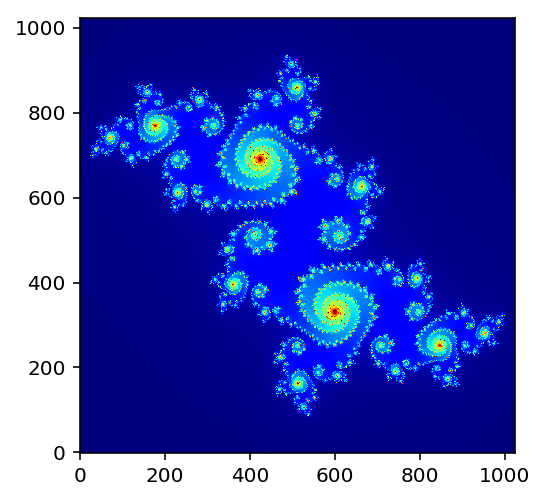

In [25]:
plt.imshow(Julia(f1,-1.3 - 1.3j,1.3 + 1.3j,m = 1024, n = 1024), cmap = cm.jet, origin = 'lower')

In [41]:
z_list = [0.4 +.30j]
z1_list =[0.42 + .31j]
for i in range(40):
    z_list.append(f1(z_list[-1]))
    z1_list.append(f1(z1_list[-1]))

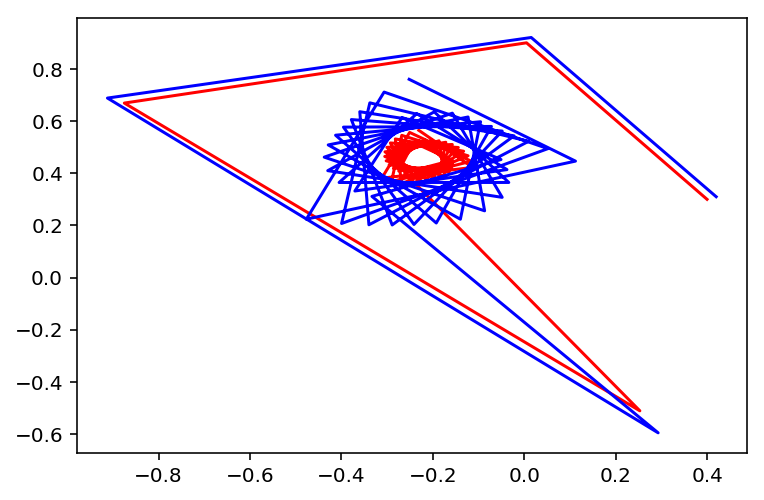

In [42]:
plt.plot([z.real for z in z_list],[z.imag for z in z_list],'r-')
plt.plot([z.real for z in z1_list],[z.imag for z in z1_list],'b-')


In [15]:
z_list

[(0.9+0.3j),
 (0.655+1.2000000000000002j),
 (-1.0759750000000003+2.232j),
 (-3.8891017993750006-4.143152400000002j),
 (-2.1055990037239085+32.88628290784971j),
 (-1077.139056330645-137.8306490539019j),
 (1141231.1938542523+296926.2105107204j),
 (1214243463337.6807+677722907416.197j),
 (1.0150788490216222e+24+1.6458412205686508e+24j),
 (-1.678408253591845e+48+3.3413172236943356e+48j),
 (-8.347346523631195e+96-1.1216188812234324e+97j)]

In [9]:
z_list[0].imag

TypeError: 'float' object is not callable